In [1]:
using 
    Plots,
    StatPlots,
    RecipesBase,
    Colors, 
    Images,
    DataFrames,
    DataFramesMeta,
    Underscore,
    ConjugatePriors,
    Particles,
    Distances, 
    JuliennedArrays

flip(x::AbstractVector) = reshape(x, (1,:))

const It = Base.Iterators

using Revise
Revise.track("modeling.jl")
using DotLearning
include("experiments.jl")
include("plots.jl")

using JLD2
@load "data/dots2014.jld2"
@load "prior_empirical.jld2"
@load "results/run3-2018-07-18T12:40:07.059.jld2" results expts

2-element Array{Symbol,1}:
 :results
 :expts  

# Judgements are made in context and contexts _vary_

# Context provides *information*

* a _context_ has statistical regularities
* these regularities provide additional information about stimuli in context

# Need to _learn_ contexts to benefit

# Spatial memory task

* View location, then mask, then immediate recall.
* Dots occur in clusters of 3, 6, 9, or 12.

In [2]:
recall1 = @where(recall, :subjid1 .== first(:subjid1))

200×24 DataFrames.DataFrame. Omitted printing of 15 columns
│ Row │ subjid1 │ block │ rep │ respnr │ line │ rad │ var  │ pred │ new_block │
├─────┼─────────┼───────┼─────┼────────┼──────┼─────┼──────┼──────┼───────────┤
│ 1   │ 1       │ 1     │ 1   │ 1      │ 1    │ 0.0 │ 0.01 │ 0    │ false     │
│ 2   │ 1       │ 1     │ 2   │ 2      │ 1    │ 0.0 │ 0.01 │ 0    │ false     │
│ 3   │ 1       │ 1     │ 3   │ 3      │ 1    │ 0.0 │ 0.01 │ 0    │ false     │
│ 4   │ 1       │ 1     │ 4   │ 4      │ 1    │ 0.0 │ 0.01 │ 0    │ false     │
│ 5   │ 1       │ 1     │ 5   │ 5      │ 1    │ 0.0 │ 0.01 │ 0    │ false     │
│ 6   │ 1       │ 1     │ 6   │ 6      │ 1    │ 0.0 │ 0.01 │ 0    │ false     │
│ 7   │ 1       │ 1     │ 7   │ 7      │ 1    │ 0.0 │ 0.01 │ 0    │ false     │
│ 8   │ 1       │ 1     │ 8   │ 8      │ 1    │ 0.0 │ 0.01 │ 0    │ false     │
│ 9   │ 1       │ 1     │ 9   │ 9      │ 1    │ 0.0 │ 0.01 │ 0    │ false     │
│ 10  │ 1       │ 1     │ 10  │ 10     │ 1    │ 0.0 │ 0.01 │ 0    │ false     │
│ 11  │ 1       │ 1     │ 11  │ 11     │ 1    │ 0.0 │ 0.01 │ 0    │ false     │
⋮
│ 189 │ 1       │ 25    │ 1   │ 189    │ 17   │ 0.3 │ 0.04 │ 0    │ true      │
│ 190 │ 1       │ 25    │ 2   │ 190    │ 17   │ 0.3 │ 0.04 │ 0    │ false     │
│ 191 │ 1       │ 25    │ 3   │ 191    │ 17   │ 0.3 │ 0.04 │ 0    │ false     │
│ 192 │ 1       │ 25    │ 4   │ 192    │ 17   │ 0.3 │ 0.04 │ 0    │ false     │
│ 193 │ 1       │ 25    │ 5   │ 193    │ 17   │ 0.3 │ 0.04 │ 0    │ false     │
│ 194 │ 1       │ 25    │ 6   │ 194    │ 17   │ 0.3 │ 0.04 │ 0    │ false     │
│ 195 │ 1       │ 25    │ 7   │ 195    │ 17   │ 0.3 │ 0.04 │ 0    │ false     │
│ 196 │ 1       │ 25    │ 8   │ 196    │ 17   │ 0.3 │ 0.04 │ 0    │ false     │
│ 197 │ 1       │ 25    │ 9   │ 197    │ 17   │ 0.3 │ 0.04 │ 0    │ false     │
│ 198 │ 1       │ 25    │ 10  │ 198    │ 17   │ 0.3 │ 0.04 │ 0    │ false     │
│ 199 │ 1       │ 25    │ 11  │ 199    │ 17   │ 0.3 │ 0.04 │ 0    │ false     │
│ 200 │ 1       │ 25    │ 12  │ 200    │ 17   │ 0.3 │ 0.04 │ 0    │ false     │

In [3]:
@userplot Arena
@recipe function f(p::Arena)

    seriestype --> :scatter
    aspect_ratio --> :equal
    axis --> false
    grid --> false
    legend --> false
    
    x, y = length(p.args)==2 ? p.args : ([], [])
    @series begin
        seriestype --> :scatter
        x,y
    end

    @series begin
        group := nothing
        color := Gray(0.2)
        seriestype := :path
        cos.(linspace(0,2π,200)), sin.(linspace(0,2π,200))
    end
    
end

Plots.group_as_matrix(::Arena) = true

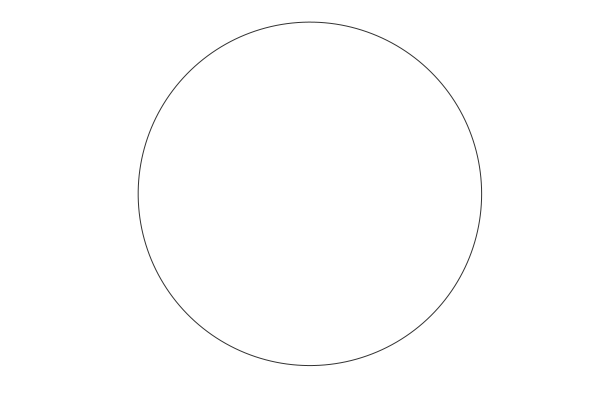

In [4]:
p = arena(color="black")
#plot!(cos.(linspace(0,2π)), sin.(linspace(0,2π)), color=Gray(0.2), seriestype=:path)

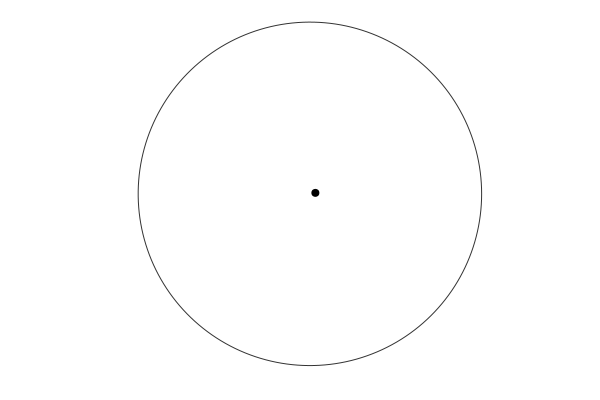

In [5]:
@df recall1 push!(p, :x[1], :y[1])

In [6]:
anim = @animate for (x,y) in @_ zip(recall1[:x], recall1[:y]) |> It.drop(_, 20) |> It.take(_, 100)
    push!(p, x,y)
end

gif(anim, "figures/task.gif", fps=10)

INFO: Saved animation to /home/dave/work/dots-location-memory-pernille/figures/task.gif


Plots.AnimatedGif("/home/dave/work/dots-location-memory-pernille/figures/task.gif")

# Recall is biased

* negative relationship between study and recall radius: more likely to under estimate a large radius
* "shrinkage"

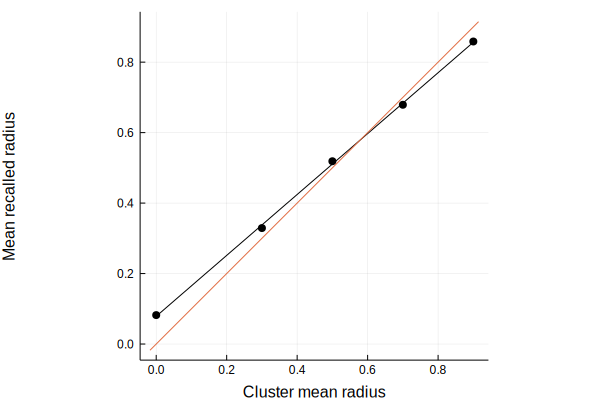

In [7]:
@_ recall |>
    @where(_, :block .> 1) |>
    @by(_, [:rad], rho_bias = mean(:new_rho_bias), rho_resp = mean(:rho_resp./2π)) |>
    @df(_, scatter(:rad, :rho_resp, color=:black, smooth=true, aspect_ratio=:equal, legend=false,
                   xlabel="Cluster mean radius", ylabel="Mean recalled radius"))

plot!(x->x, label="")

* Can see this more clearly plotting as the _bias_:
* negative slope means _shrinkage_

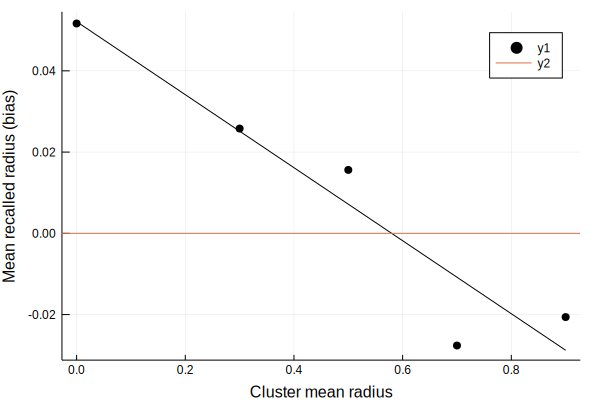

In [8]:
@_ recall |>
    @where(_, :block .> 1) |>
    @by(_, [:rad], rho_bias = mean(:new_rho_bias./2π), rho_resp = mean(:rho_resp./2π)) |>
    @df(_, scatter(:rad, :rho_bias, color=:black, smooth=true, xlabel="Cluster mean radius", ylabel="Mean recalled radius (bias)"))
plot!(0,0, seriestype=:hline)
hline!([0])

* how do we know that people are picking up on the clusters?
* That bias is stronger early in a cluster, suggesting people fall back on a global estimate in the absence of information about the specific cluster:

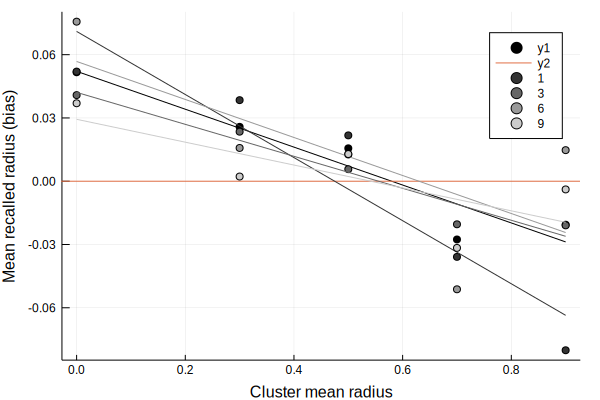

In [9]:
@_ recall |>
    @where(_, :block .> 1, [r ∈ [1,3,6,9] for r in :rep]) |>
    @by(_, [:rad, :rep], rho_bias = mean(:new_rho_bias./2π), rho_resp = mean(:rho_resp./2π)) |>
    @df(_, scatter!(:rad, :rho_bias, group=:rep, color=Gray.([.2 .4 .6 .8]), smooth=true, markeralpha=1))

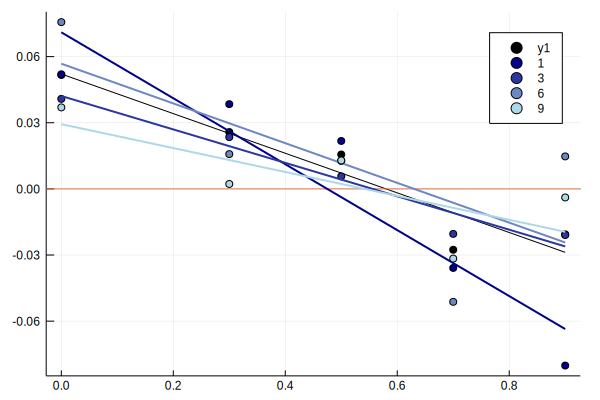

In [10]:
@_ recall |>
    @where(_, :block .> 1) |>
    @by(_, [:rad], rho_bias = mean(:new_rho_bias./2π), rho_resp = mean(:rho_resp./2π)) |>
    @df(_, scatter(:rad, :rho_bias, color=:black, smooth=true))
plot!(0,0, seriestype=:hline)
hline!([0], label="")

@_ recall |>
    @where(_, :block .> 1, [r ∈ [1,3,6,9] for r in :rep]) |>
    @by(_, [:rad, :rep], rho_bias = mean(:new_rho_bias./2π), rho_resp = mean(:rho_resp./2π)) |>
    @df(_, scatter!(:rad, :rho_bias, group=:rep, markerz=.-:rep, line=2, linez=.-:rep, color=:blues, smooth=true, markeralpha=1, colorbar=false))

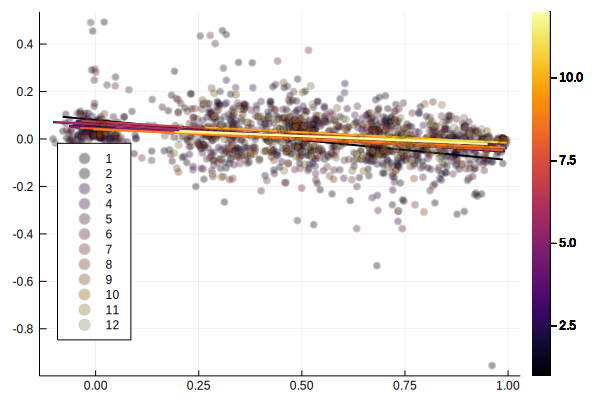

In [11]:
@_ recall |>
    @where(_, :block .> 1) |>
    @df(_, scatter(:rho ./ 2π, (abs.(:rho_resp).-abs.(:rho)) ./ 2π, group=:rep, smooth=true, markeralpha=0.2, 
        markerz = :rep, linez = :rep, linealpha=1, line=2, legend=:bottomleft))

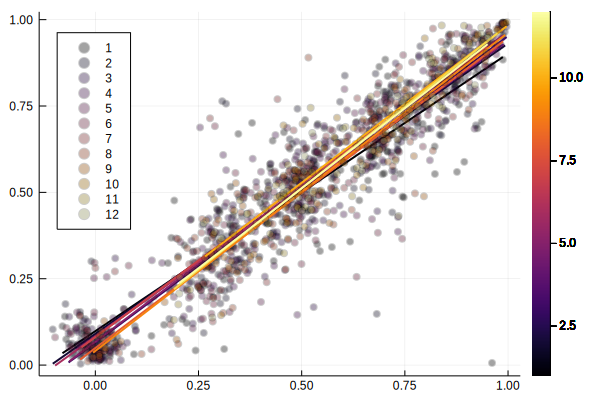

In [12]:
@_ recall |>
    @where(_, :block .> 1) |>
    @df(_, scatter(:rho ./ 2π, :rho_resp ./ 2π, group=:rep, smooth=true, markeralpha=0.2, 
        markerz = :rep, linez = :rep, linealpha=1, line=2, legend=:topleft))

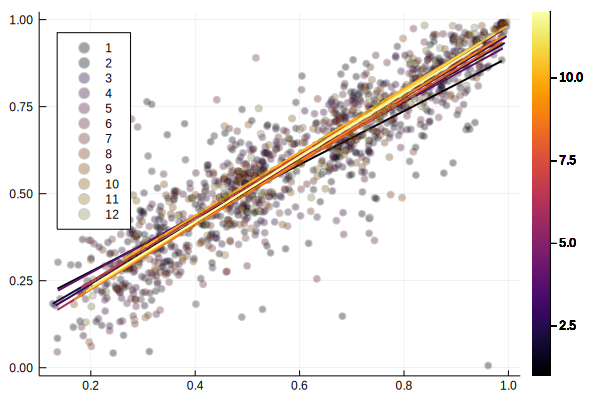

In [13]:
@_ recall |>
    @where(_, :block .> 1, :rad .> 0) |>
    @df(_, scatter(:rho ./ 2π, :rho_resp ./ 2π, group=:rep, smooth=true, markeralpha=0.2, 
        markerz = :rep, linez = :rep, linealpha=1, line=2, legend=:topleft))

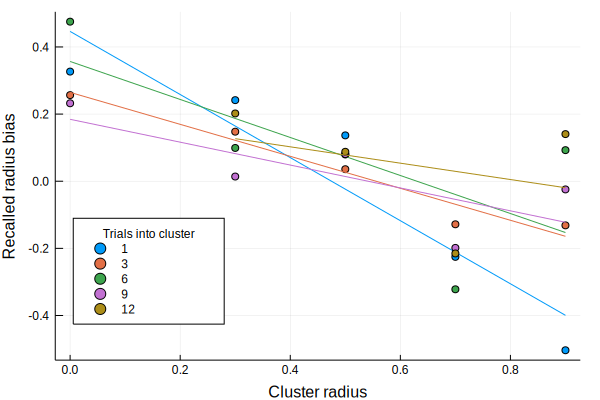

In [14]:
@_ recall |>
    @where(_, :block .> 1, [r ∈ [1, 3, 6, 9, 12] for r in :rep]) |>
    @by(_, [:rep, :rad], rho_bias = mean(:new_rho_bias)) |>
    @df(_, scatter(:rad, :rho_bias, group=:rep, smooth=true, colorbar=false,
        legend_title="Trials into cluster", legend=:bottomleft,
                   xlabel="Cluster radius", ylabel="Recalled radius bias"))

# Learning contexts

* _Infer_ how points $x_t$ are assigned $z_t$
    * $p(z_1, \ldots, z_T | x_1, \ldots, x_T) \propto p(x_1, \ldots, x_T | z_1, \ldots, z_T) p(z_1, \ldots, z_T)$
* Prior: $p(z_1, \ldots, z_T) = p(z_1) p(z_2 | z_1) \ldots p(z_T | z_1, \ldots, z_{T-1})$
    * Prefer small number of contexts
    * Allow for up to $T$ (one per point)
* Likelihood: $p(x_t | z_t, z_{1:t-1}, x_{1:t-1})$

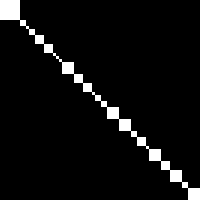

In [15]:
true_assignsim = Gray.(@with(recall1, :block .== :block'))

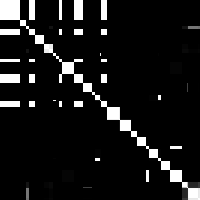

In [16]:
ps = ChenLiuParticles(1000, prior_optimized, StickyCRP(1.0, 0.9))
filter!(ps, extract_data(recall1, ps), false)
stickycrp = show_assignment_similarity(ps)

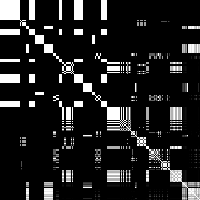

In [17]:
ps_crp = @_ ChineseRestaurantProcess(1.0) |>
    ChenLiuParticles(100, prior_optimized, _) |>
    filter!(_, extract_data(recall1, _), false)
crp = ps_crp |> show_assignment_similarity

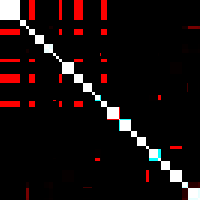

In [18]:
colorview(RGB, stickycrp, true_assignsim, true_assignsim)

In [19]:
assignments(ps)
sort!(ps.particles, by=weight, rev=true)
weight.(ps.particles)

1000-element Array{Float64,1}:
 0.00148924
 0.00146007
 0.00146007
 0.00146007
 0.00146007
 0.00146007
 0.00146007
 0.00146007
 0.00146007
 0.00146007
 0.00146007
 0.00146007
 0.00146007
 ⋮         
 1.85113e-5
 1.85113e-5
 1.77862e-5
 1.35554e-5
 1.08089e-5
 7.49188e-6
 7.49188e-6
 7.19874e-6
 7.19874e-6
 7.19874e-6
 7.19874e-6
 7.19874e-6

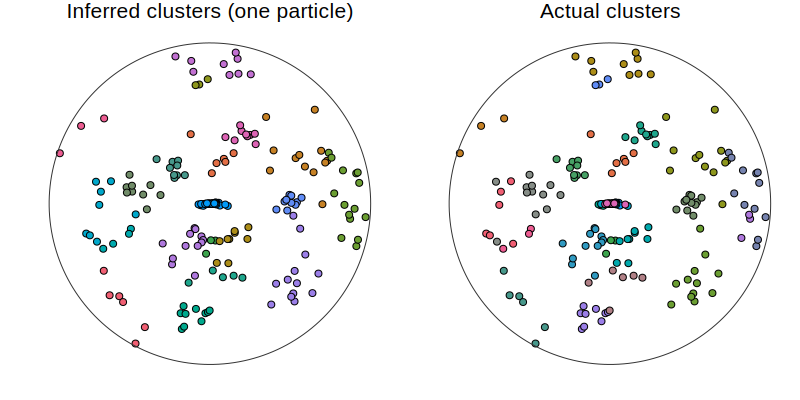

In [20]:
p1 = @df recall1 arena(:x, :y, group = assignments(first(ps.particles)), 
                     title = "Inferred clusters (one particle)")

p2 = @df recall1 arena(:x, :y, group = :block, title="Actual clusters")

plot(p1, p2, size=(800, 400))

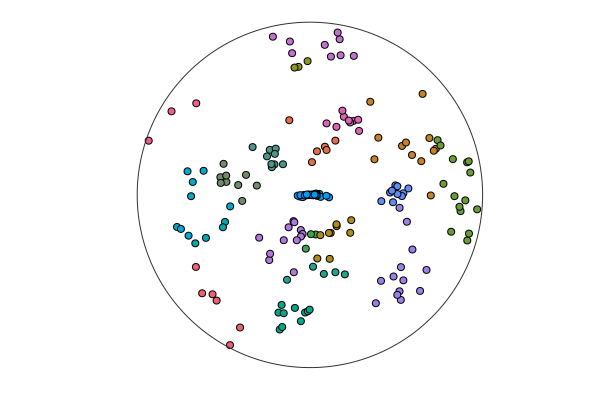

In [21]:
@df recall1 arena(:x, :y, group=assignments(first(ps.particles)))

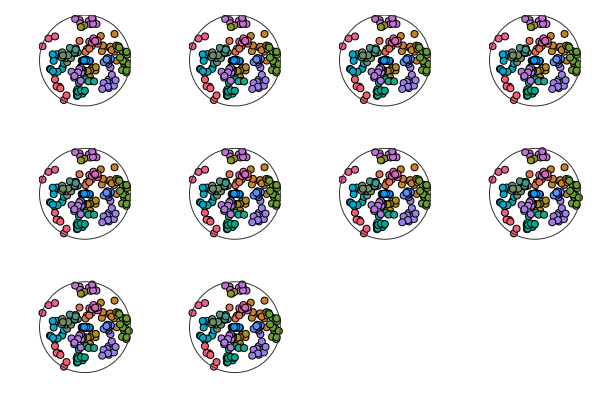

In [22]:
parts100 = map(ps.particles[1:10]) do particle
    @df recall1 arena(:x, :y, group = assignments(particle), lims=(-1,1))
end;

plot(parts100...)

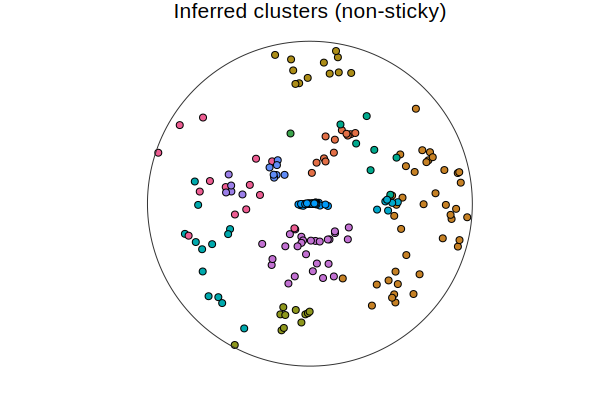

In [23]:
sort!(ps_crp.particles, by=weight, rev=true)
@df recall1 arena(:x, :y, group = assignments(first(ps_crp.particles)), 
                  title = "Inferred clusters (non-sticky)")

* for the most part, can separate clusters based on _sequence_, where the non-sticky often over- or under-clusters

In [24]:
plot(p1, p2, p3, layout=(1,3), size=(1200,400))

LoadError: [91mUndefVarError: p3 not defined[39m

# Modeling behavior

# Recall

* Recall: modeled as Bayesian cue combination (after Huttenlocher)
* two cues: thing you saw, and inferred context
* weighted average (by inverse-variance)

In [25]:
# result:
#   .experiment:
#     .data:
#     - (recall1, recall2, ...)
#     - (pred1, pred2, ...)
#   .result
#   - (recalled1, predicted1)
#   - (recalled2, predicted2)
#   - ...

function add_params!(df::AbstractDataFrame, params)
    for (k,v) in params
        df[k] = v
    end
    df
end

# extract input data (which is by subject) and predictions
recalled(r) =
    add_params!(hcat(vcat(r.experiment.data[1]...),
                     vcat(first.(r.result)...)),
                r.experiment.params)

predicted(r) =
    add_params!(hcat(vcat(r.experiment.data[2]...),
                     vcat(last.(r.result)...)[[:xys_mod]]),
                r.experiment.params)

predicted (generic function with 1 method)

In [26]:
recalled_all = mapreduce(recalled, vcat, results)

576000×33 DataFrames.DataFrame. Omitted printing of 25 columns
│ Row    │ subjid1 │ block │ rep  │ respnr │ line │ rad │ var  │ pred │
├────────┼─────────┼───────┼──────┼────────┼──────┼─────┼──────┼──────┤
│ 1      │ 1.0     │ 1.0   │ 1.0  │ 1.0    │ 1.0  │ 0.0 │ 0.01 │ 0.0  │
│ 2      │ 1.0     │ 1.0   │ 2.0  │ 2.0    │ 1.0  │ 0.0 │ 0.01 │ 0.0  │
│ 3      │ 1.0     │ 1.0   │ 3.0  │ 3.0    │ 1.0  │ 0.0 │ 0.01 │ 0.0  │
│ 4      │ 1.0     │ 1.0   │ 4.0  │ 4.0    │ 1.0  │ 0.0 │ 0.01 │ 0.0  │
│ 5      │ 1.0     │ 1.0   │ 5.0  │ 5.0    │ 1.0  │ 0.0 │ 0.01 │ 0.0  │
│ 6      │ 1.0     │ 1.0   │ 6.0  │ 6.0    │ 1.0  │ 0.0 │ 0.01 │ 0.0  │
│ 7      │ 1.0     │ 1.0   │ 7.0  │ 7.0    │ 1.0  │ 0.0 │ 0.01 │ 0.0  │
│ 8      │ 1.0     │ 1.0   │ 8.0  │ 8.0    │ 1.0  │ 0.0 │ 0.01 │ 0.0  │
│ 9      │ 1.0     │ 1.0   │ 9.0  │ 9.0    │ 1.0  │ 0.0 │ 0.01 │ 0.0  │
│ 10     │ 1.0     │ 1.0   │ 10.0 │ 10.0   │ 1.0  │ 0.0 │ 0.01 │ 0.0  │
│ 11     │ 1.0     │ 1.0   │ 11.0 │ 11.0   │ 1.0  │ 0.0 │ 0.01 │ 0.0  │
⋮
│ 575989 │ 8.0     │ 23.0  │ 10.0 │ 189.0  │ 17.0 │ 0.3 │ 0.04 │ 0.0  │
│ 575990 │ 8.0     │ 23.0  │ 11.0 │ 190.0  │ 17.0 │ 0.3 │ 0.04 │ 0.0  │
│ 575991 │ 8.0     │ 23.0  │ 12.0 │ 191.0  │ 17.0 │ 0.3 │ 0.04 │ 0.0  │
│ 575992 │ 8.0     │ 24.0  │ 1.0  │ 192.0  │ 23.0 │ 0.0 │ 0.01 │ 0.0  │
│ 575993 │ 8.0     │ 24.0  │ 2.0  │ 193.0  │ 23.0 │ 0.0 │ 0.01 │ 0.0  │
│ 575994 │ 8.0     │ 24.0  │ 3.0  │ 194.0  │ 23.0 │ 0.0 │ 0.01 │ 0.0  │
│ 575995 │ 8.0     │ 24.0  │ 4.0  │ 195.0  │ 23.0 │ 0.0 │ 0.01 │ 0.0  │
│ 575996 │ 8.0     │ 24.0  │ 5.0  │ 196.0  │ 23.0 │ 0.0 │ 0.01 │ 0.0  │
│ 575997 │ 8.0     │ 24.0  │ 6.0  │ 197.0  │ 23.0 │ 0.0 │ 0.01 │ 0.0  │
│ 575998 │ 8.0     │ 25.0  │ 1.0  │ 198.0  │ 4.0  │ 0.0 │ 0.01 │ 0.0  │
│ 575999 │ 8.0     │ 25.0  │ 2.0  │ 199.0  │ 4.0  │ 0.0 │ 0.01 │ 0.0  │
│ 576000 │ 8.0     │ 25.0  │ 3.0  │ 200.0  │ 4.0  │ 0.0 │ 0.01 │ 0.0  │

rec_params_good = @_(((recalled_summaries |> @where(_, :Sσ .≈ 0.01)) |> sort!(_, :cos, rev=true)) |> head(_, 1)) = 1×5 DataFrames.DataFrame
│ Row │ α    │ ρ   │ Sσ   │ cos     │ mse      │
├─────┼──────┼─────┼──────┼─────────┼──────────┤
│ 1   │ 0.01 │ 0.9 │ 0.01 │ 0.11091 │ 0.123901 │


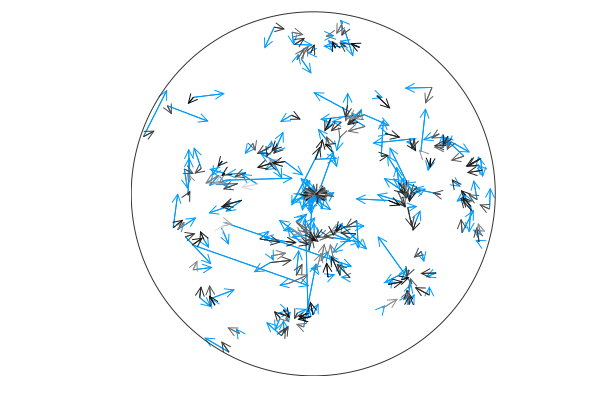

In [54]:
cosinesim(d) = cosinesim(d,d)
mse(d) = mse(d,d)

recalled_summaries = by(recalled_all, [:α, :ρ, :Sσ], d -> DataFrame(cos=cosinesim(d), mse=mse(d)))

# get a good parameter setting (one where cosine similarity is high and Sσ is high enough to see)
@show rec_params_good = @_ recalled_summaries |>
    @where(_, :Sσ .≈ 0.01) |>
    sort!(_, :cos, rev=true) |> 
    head(_, 1) 

# average over iterations
recalled_good = @_ rec_params_good |>
    join(recalled_all, _, on=[:α, :ρ, :Sσ]) |>
    @by(_, [:subjid1, :block, :rep, :rep_number, :respnr, :rad, :var, :x, :y, :x_resp, :y_resp],
        x_mod = mean(:x_mod), y_mod = mean(:y_mod)) 


recalled1 = @_ recalled_good |>
    @where(_, :subjid1 .== first(:subjid1))

@df(recalled1, begin
    arena(:x, :y, quiver=(:x_resp .- :x, :y_resp .- :y), seriestype=:quiver)
    quiver!(:x, :y, quiver=(:x_mod .- :x, :y_mod .- :y), line_z=:rep, color=:grays)
    end)

In [28]:
rho(args...) = sqrt(sum(args.^2))

rho (generic function with 1 method)

* Modeling radial bias: not a great measure at zero because if there's _response_ noise as well then you'll get a positive bias

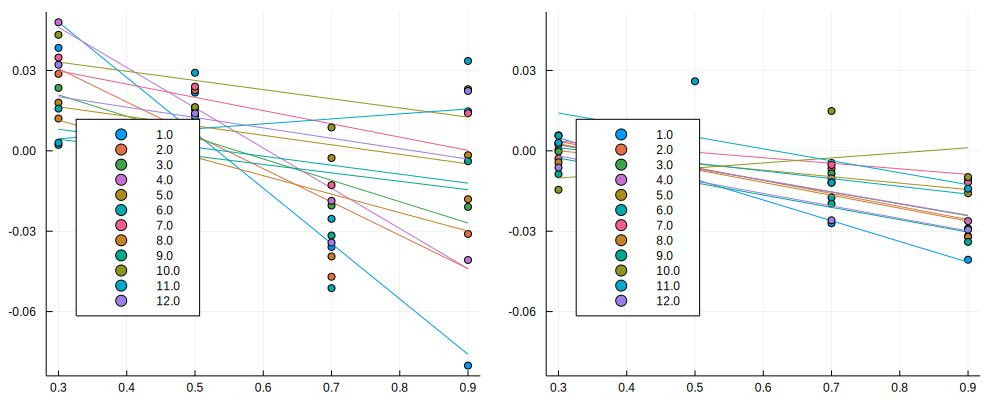

In [29]:
@_ recalled_good |>
    @where(_, :block .> 1) |>
    @transform(_, rho = rho.(:x, :y),
                  rho_resp = rho.(:x_resp, :y_resp),
                  rho_mod = rho.(:x_mod, :y_mod)) |>
    @by(_, [:rad, :rep], rho_bias_resp=mean(:rho_resp .- :rho),
                         rho_bias_mod=mean(:rho_mod .- :rho)) |>
    @where(_, :rad .> 0) |>
    @df(_, plot(scatter(:rad, :rho_bias_resp, group=:rep, smooth=true),# marker_z = :rep, line_z=:rep, color=:blues),
                scatter(:rad, :rho_bias_mod, group=:rep, smooth=true),# marker_z = :rep, line_z=:rep, color=:blues),
                size=(1000,400), legend=:bottomleft, link=:y))

## Baseline: clusters are known

In [57]:
known_recalled = by(recall, :subjid1) do d
    @_ KnownFilter(prior_optimized) |>
    RecallFilter(_, Matrix(rec_params_good[1, :Sσ]*I,2,2)) |>
    filter!(_, extract_data(d, _)) |>
    DataFrame |>
    hcat(d, _) |>
    delete!(_, :subjid1) |>
    @transform(_, cosinesim = 1.-Distances.colwise(CosineDist(), 
                                                   hcat(:x_mod.-:x, :y_mod.-:y)', 
                                                   hcat(:x_resp.-:x, :y_resp.-:y)'))
end

known_recalled1 = @where(known_recalled, :subjid1 .== 1)

200×28 DataFrames.DataFrame. Omitted printing of 19 columns
│ Row │ subjid1 │ block │ rep │ respnr │ line │ rad │ var  │ pred │ new_block │
├─────┼─────────┼───────┼─────┼────────┼──────┼─────┼──────┼──────┼───────────┤
│ 1   │ 1       │ 1     │ 1   │ 1      │ 1    │ 0.0 │ 0.01 │ 0    │ false     │
│ 2   │ 1       │ 1     │ 2   │ 2      │ 1    │ 0.0 │ 0.01 │ 0    │ false     │
│ 3   │ 1       │ 1     │ 3   │ 3      │ 1    │ 0.0 │ 0.01 │ 0    │ false     │
│ 4   │ 1       │ 1     │ 4   │ 4      │ 1    │ 0.0 │ 0.01 │ 0    │ false     │
│ 5   │ 1       │ 1     │ 5   │ 5      │ 1    │ 0.0 │ 0.01 │ 0    │ false     │
│ 6   │ 1       │ 1     │ 6   │ 6      │ 1    │ 0.0 │ 0.01 │ 0    │ false     │
│ 7   │ 1       │ 1     │ 7   │ 7      │ 1    │ 0.0 │ 0.01 │ 0    │ false     │
│ 8   │ 1       │ 1     │ 8   │ 8      │ 1    │ 0.0 │ 0.01 │ 0    │ false     │
│ 9   │ 1       │ 1     │ 9   │ 9      │ 1    │ 0.0 │ 0.01 │ 0    │ false     │
│ 10  │ 1       │ 1     │ 10  │ 10     │ 1    │ 0.0 │ 0.01 │ 0    │ false     │
│ 11  │ 1       │ 1     │ 11  │ 11     │ 1    │ 0.0 │ 0.01 │ 0    │ false     │
⋮
│ 189 │ 1       │ 25    │ 1   │ 189    │ 17   │ 0.3 │ 0.04 │ 0    │ true      │
│ 190 │ 1       │ 25    │ 2   │ 190    │ 17   │ 0.3 │ 0.04 │ 0    │ false     │
│ 191 │ 1       │ 25    │ 3   │ 191    │ 17   │ 0.3 │ 0.04 │ 0    │ false     │
│ 192 │ 1       │ 25    │ 4   │ 192    │ 17   │ 0.3 │ 0.04 │ 0    │ false     │
│ 193 │ 1       │ 25    │ 5   │ 193    │ 17   │ 0.3 │ 0.04 │ 0    │ false     │
│ 194 │ 1       │ 25    │ 6   │ 194    │ 17   │ 0.3 │ 0.04 │ 0    │ false     │
│ 195 │ 1       │ 25    │ 7   │ 195    │ 17   │ 0.3 │ 0.04 │ 0    │ false     │
│ 196 │ 1       │ 25    │ 8   │ 196    │ 17   │ 0.3 │ 0.04 │ 0    │ false     │
│ 197 │ 1       │ 25    │ 9   │ 197    │ 17   │ 0.3 │ 0.04 │ 0    │ false     │
│ 198 │ 1       │ 25    │ 10  │ 198    │ 17   │ 0.3 │ 0.04 │ 0    │ false     │
│ 199 │ 1       │ 25    │ 11  │ 199    │ 17   │ 0.3 │ 0.04 │ 0    │ false     │
│ 200 │ 1       │ 25    │ 12  │ 200    │ 17   │ 0.3 │ 0.04 │ 0    │ false     │

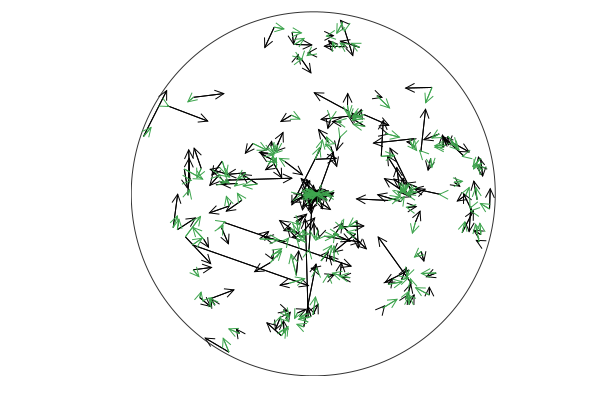

In [68]:
@df recall1 arena(:x, :y, quiver=(:x_resp.-:x, :y_resp.-:y), seriestype=:quiver, color=:black)

@_ known_recalled1 |>
    @where(_, :block .> 1) |>
    @df _ quiver!(:x, :y, quiver=(:x_mod.-:x, :y_mod.-:y))

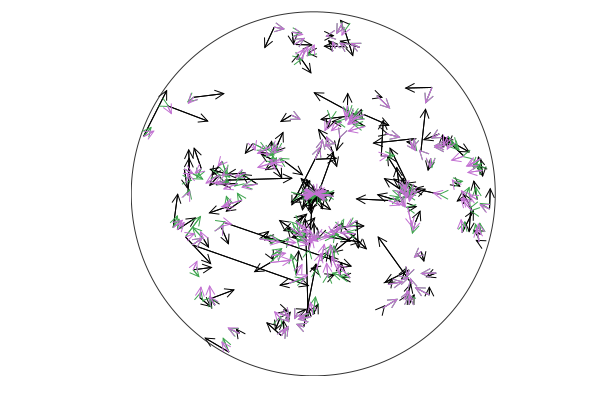

In [69]:
@_ recalled1 |>
    @where(_, :block .> 1) |>
    @df _ quiver!(:x, :y, quiver=(:x_mod.-:x, :y_mod.-:y))

# Prediction

In [32]:
predicted(first(results))

680×27 DataFrames.DataFrame. Omitted printing of 18 columns
│ Row │ subjid1 │ block │ rep  │ respnr │ line │ rad │ var │ pred │ new_block │
├─────┼─────────┼───────┼──────┼────────┼──────┼─────┼─────┼──────┼───────────┤
│ 1   │ 1.0     │ 1.0   │ 20.0 │ 20     │ 1.0  │ 0.0 │ 0.0 │ 10   │ 0.0       │
│ 2   │ 1.0     │ 2.0   │ 3.0  │ 23     │ 6.0  │ 0.3 │ 0.0 │ 1    │ 0.0       │
│ 3   │ 1.0     │ 2.0   │ 6.0  │ 26     │ 6.0  │ 0.3 │ 0.0 │ 5    │ 0.0       │
│ 4   │ 1.0     │ 2.0   │ 6.0  │ 26     │ 6.0  │ 0.3 │ 0.0 │ 10   │ 0.0       │
│ 5   │ 1.0     │ 3.0   │ 3.0  │ 29     │ 19.0 │ 0.3 │ 0.0 │ 1    │ 0.0       │
│ 6   │ 1.0     │ 3.0   │ 3.0  │ 29     │ 19.0 │ 0.3 │ 0.0 │ 10   │ 0.0       │
│ 7   │ 1.0     │ 4.0   │ 3.0  │ 32     │ 9.0  │ 0.0 │ 0.0 │ 1    │ 0.0       │
│ 8   │ 1.0     │ 4.0   │ 6.0  │ 35     │ 9.0  │ 0.0 │ 0.0 │ 5    │ 0.0       │
│ 9   │ 1.0     │ 4.0   │ 6.0  │ 35     │ 9.0  │ 0.0 │ 0.0 │ 10   │ 0.0       │
│ 10  │ 1.0     │ 5.0   │ 3.0  │ 38     │ 7.0  │ 0.9 │ 0.0 │ 1    │ 0.0       │
│ 11  │ 1.0     │ 5.0   │ 6.0  │ 41     │ 7.0  │ 0.9 │ 0.0 │ 5    │ 0.0       │
⋮
│ 669 │ 8.0     │ 22.0  │ 12.0 │ 179    │ 22.0 │ 0.7 │ 0.0 │ 5    │ 0.0       │
│ 670 │ 8.0     │ 22.0  │ 12.0 │ 179    │ 22.0 │ 0.7 │ 0.0 │ 10   │ 0.0       │
│ 671 │ 8.0     │ 23.0  │ 3.0  │ 182    │ 17.0 │ 0.3 │ 0.0 │ 1    │ 0.0       │
│ 672 │ 8.0     │ 23.0  │ 6.0  │ 185    │ 17.0 │ 0.3 │ 0.0 │ 5    │ 0.0       │
│ 673 │ 8.0     │ 23.0  │ 9.0  │ 188    │ 17.0 │ 0.3 │ 0.0 │ 1    │ 0.0       │
│ 674 │ 8.0     │ 23.0  │ 12.0 │ 191    │ 17.0 │ 0.3 │ 0.0 │ 5    │ 0.0       │
│ 675 │ 8.0     │ 23.0  │ 12.0 │ 191    │ 17.0 │ 0.3 │ 0.0 │ 10   │ 0.0       │
│ 676 │ 8.0     │ 24.0  │ 3.0  │ 194    │ 23.0 │ 0.0 │ 0.0 │ 1    │ 0.0       │
│ 677 │ 8.0     │ 24.0  │ 6.0  │ 197    │ 23.0 │ 0.0 │ 0.0 │ 5    │ 0.0       │
│ 678 │ 8.0     │ 24.0  │ 6.0  │ 197    │ 23.0 │ 0.0 │ 0.0 │ 10   │ 0.0       │
│ 679 │ 8.0     │ 25.0  │ 3.0  │ 200    │ 4.0  │ 0.0 │ 0.0 │ 1    │ 0.0       │
│ 680 │ 8.0     │ 25.0  │ 3.0  │ 200    │ 4.0  │ 0.0 │ 0.0 │ 10   │ 0.0       │

In [156]:
?sort!

search: sort! sortperm! showgradient! sort sortrows sortperm sortcols



```
sort!(v; alg::Algorithm=defalg(v), lt=isless, by=identity, rev::Bool=false, order::Ordering=Forward)
```

Sort the vector `v` in place. `QuickSort` is used by default for numeric arrays while `MergeSort` is used for other arrays. You can specify an algorithm to use via the `alg` keyword (see Sorting Algorithms for available algorithms). The `by` keyword lets you provide a function that will be applied to each element before comparison; the `lt` keyword allows providing a custom "less than" function; use `rev=true` to reverse the sorting order. These options are independent and can be used together in all possible combinations: if both `by` and `lt` are specified, the `lt` function is applied to the result of the `by` function; `rev=true` reverses whatever ordering specified via the `by` and `lt` keywords.

# Examples

```jldoctest
julia> v = [3, 1, 2]; sort!(v); v
3-element Array{Int64,1}:
 1
 2
 3

julia> v = [3, 1, 2]; sort!(v, rev = true); v
3-element Array{Int64,1}:
 3
 2
 1

julia> v = [(1, "c"), (3, "a"), (2, "b")]; sort!(v, by = x -> x[1]); v
3-element Array{Tuple{Int64,String},1}:
 (1, "c")
 (2, "b")
 (3, "a")

julia> v = [(1, "c"), (3, "a"), (2, "b")]; sort!(v, by = x -> x[2]); v
3-element Array{Tuple{Int64,String},1}:
 (3, "a")
 (2, "b")
 (1, "c")
```

```
sort!(df::AbstractDataFrame, cols;
      alg::Union{Algorithm, Nothing}=nothing, lt=isless, by=identity,
      rev::Bool=false, order::Ordering=Forward)
```

Sort data frame `df` by column(s) `cols`. `cols` can be either a `Symbol` or `Integer` column index, or a tuple or vector of such indices.

If `alg` is `nothing` (the default), the most appropriate algorithm is chosen automatically among `TimSort`, `MergeSort` and `RadixSort` depending on the type of the sorting columns and on the number of rows in `df`. If `rev` is `true`, reverse sorting is performed. To enable reverse sorting only for some columns, pass `order(c, rev=true)` in `cols`, with `c` the corresponding column index (see example below). See other methods for a description of other keyword arguments.

# Examples

```jldoctest julia> df = DataFrame(x = [3, 1, 2, 1], y = ["b", "c", "a", "b"]) 4×2 DataFrames.DataFrame │ Row │ x │ y │ ├─────┼───┼───┤ │ 1   │ 3 │ b │ │ 2   │ 1 │ c │ │ 3   │ 2 │ a │ │ 4   │ 1 │ b │

julia> sort!(df, :x) 4×2 DataFrames.DataFrame │ Row │ x │ y │ ├─────┼───┼───┤ │ 1   │ 1 │ c │ │ 2   │ 1 │ b │ │ 3   │ 2 │ a │ │ 4   │ 3 │ b │

julia> sort!(df, (:x, :y)) 4×2 DataFrames.DataFrame │ Row │ x │ y │ ├─────┼───┼───┤ │ 1   │ 1 │ b │ │ 2   │ 1 │ c │ │ 3   │ 2 │ a │ │ 4   │ 3 │ b │

julia> sort!(df, (:x, :y), rev=true) 4×2 DataFrames.DataFrame │ Row │ x │ y │ ├─────┼───┼───┤ │ 1   │ 3 │ b │ │ 2   │ 2 │ a │ │ 3   │ 1 │ c │ │ 4   │ 1 │ b │

julia> sort!(df, (:x, order(:y, rev=true))) 4×2 DataFrames.DataFrame │ Row │ x │ y │ ├─────┼───┼───┤ │ 1   │ 1 │ c │ │ 2   │ 1 │ b │ │ 3   │ 2 │ a │ │ 4   │ 3 │ b │ ````


In [157]:
predicted_all = @_ vcat([predicted(r) for r in results]...) |>
    @by(_, [:subjid1, :block, :respnr, :pred, :theta_resp, :rho_resp, :α, :ρ], xys_mod = (:xys_mod...)) |>
    @transform(_, subjid1 = Int.(:subjid1),
                  block = Int.(:block), 
                  respnr = Int.(:respnr),
                  x_resp = cos.(:theta_resp) .* :rho_resp./2π,
                  y_resp = sin.(:theta_resp) .* :rho_resp./2π,
                  xys_mod = [vcat(xym...) for xym in :xys_mod])

predicted_good = @_ predicted_all |>
    join(_, delete!(copy(rec_params_good), :Sσ), on=[:α, :ρ]) |>
    join(_, @select(recall, :subjid1, :block, :respnr, :x, :y), 
            on=[:subjid1, :block, :respnr]) |>
    sort!(_, (:subjid1, :respnr, :pred))

predicted1 = @where(predicted_good, :subjid1 .== 1);

In [158]:
@_ predicted1 |> 
    @by(_, :respnr, pred=sort(unique(:pred)))

85×2 DataFrames.DataFrame
│ Row │ respnr │ pred │
├─────┼────────┼──────┤
│ 1   │ 20     │ 10   │
│ 2   │ 23     │ 1    │
│ 3   │ 26     │ 5    │
│ 4   │ 26     │ 10   │
│ 5   │ 29     │ 1    │
│ 6   │ 29     │ 10   │
│ 7   │ 32     │ 1    │
│ 8   │ 35     │ 5    │
│ 9   │ 35     │ 10   │
│ 10  │ 38     │ 1    │
│ 11  │ 41     │ 5    │
⋮
│ 74  │ 176    │ 5    │
│ 75  │ 179    │ 1    │
│ 76  │ 182    │ 5    │
│ 77  │ 182    │ 10   │
│ 78  │ 185    │ 1    │
│ 79  │ 188    │ 5    │
│ 80  │ 188    │ 10   │
│ 81  │ 191    │ 1    │
│ 82  │ 194    │ 5    │
│ 83  │ 197    │ 1    │
│ 84  │ 200    │ 5    │
│ 85  │ 200    │ 10   │

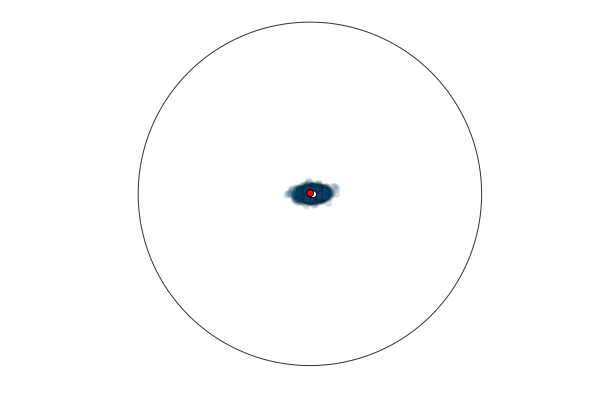

In [153]:
@df predicted1[1, :] begin
    arena(:xys_mod[1][:,1], :xys_mod[1][:,2], markeralpha=0.1)
    scatter!(:x, :y, color=:white)
    scatter!(:x_resp, :y_resp, color=:red)
end

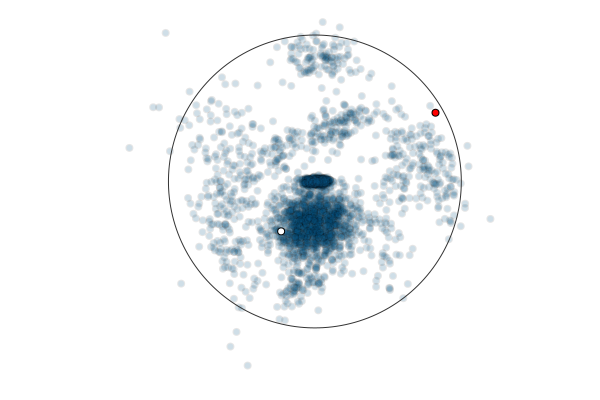

In [154]:
@df predicted1[end, :] begin
    arena(:xys_mod[1][:,1], :xys_mod[1][:,2], markeralpha=0.1)
    scatter!(:x, :y, color=:white)
    scatter!(:x_resp, :y_resp, color=:red)
end

In [159]:
let anim = Animation()
    @byrow! predicted1 begin
        arena(:xys_mod[:,1], :xys_mod[:,2], markeralpha=0.2, title="Trial $(:respnr) + $(:pred)", 
              lims=(-1.2,1.2))
        scatter!([:x], [:y], color="white")
        scatter!([:x_resp], [:y_resp], color="red")
        frame(anim)
    end
    
    gif(anim, "figures/pred1.gif", fps=1)
end


INFO: Saved animation to /home/dave/work/dots-location-memory-pernille/figures/pred1.gif


Plots.AnimatedGif("/home/dave/work/dots-location-memory-pernille/figures/pred1.gif")

* How far away from the last point do people typically guess?

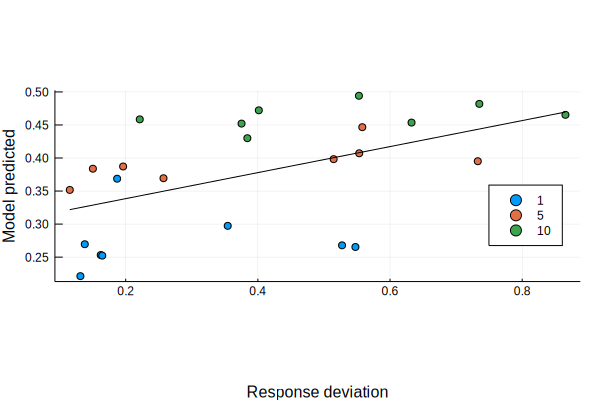

In [188]:
prediction_deviations = @_ predicted_good |>
    @transform(_, resp_dev = rho.(:x.-:x_resp, :y.-:y_resp), 
                  mod_dev = mean.(pairwise.(Euclidean(), 
                                            transpose.(hcat.(:x, :y)),
                                            transpose.(:xys_mod))))

@_ prediction_deviations |>
    @by(_, [:subjid1, :pred], resp_dev = mean(:resp_dev), mod_dev = mean(:mod_dev)) |>
    @df(_, begin 
        scatter(:resp_dev, :mod_dev, xlabel="Response deviation", ylabel="Model predicted", 
                group=:pred, legend=:bottomright, aspect_ratio=:equal)
        scatter!(:resp_dev, :mod_dev, markeralpha=0, color=:black, label="", smooth=true)
        end)


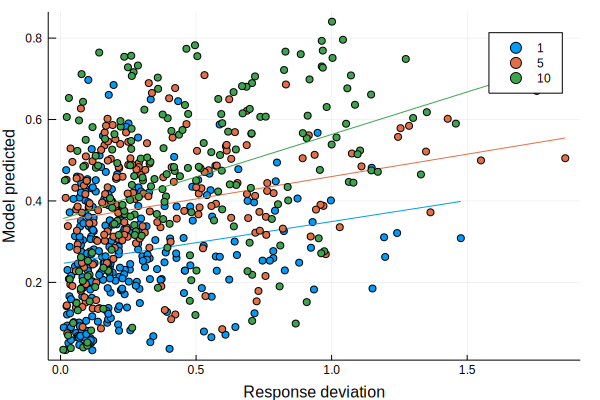

In [187]:
@_ prediction_deviations |>
    @by(_, [:subjid1, :block, :respnr, :pred], resp_dev = mean(:resp_dev), mod_dev = mean(:mod_dev)) |>
    @df(_, scatter(:resp_dev, :mod_dev, xlabel="Response deviation", ylabel="Model predicted", 
                   group=:pred, smooth=true))
